In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.figure(figsize = (20,15))

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

In [2]:
ANSUR_Female = pd.read_csv('https://assets.datacamp.com/production/repositories/3515/datasets/802fc5cdbe3a29248483e496a966627ea9629e7a/ANSUR_II_FEMALE.csv')
ANSUR_Male = pd.read_csv('https://assets.datacamp.com/production/repositories/3515/datasets/28edd853c0a6aa7316b0d84a21f8e0d821e5010d/ANSUR_II_MALE.csv')
pima = pd.read_csv('https://raw.githubusercontent.com/Andikazidanef15/Dimensionality-Reduction/main/PimaIndians.csv')
public_school = pd.read_csv('https://raw.githubusercontent.com/Andikazidanef15/Dimensionality-Reduction/main/Public_Schools2.csv')
grocery_sales = pd.read_csv('https://raw.githubusercontent.com/Andikazidanef15/Dimensionality-Reduction/main/grocery_sales.csv')
pokemon = pd.read_csv('https://raw.githubusercontent.com/Andikazidanef15/Dimensionality-Reduction/main/pokemon.csv')

# Exploring High Dimensional Data

## Visually Detecting Redundant Features

In [112]:
columns_1 = ['Gender','weight_kg','stature_m','acromialheight']
columns_2 = ['Gender','footlength','headlength']

ANSUR_Male_1 = ANSUR_Male[columns_1][:100]
ANSUR_Female_1 = ANSUR_Female[columns_1][:100]
ANSUR_Male_2 = ANSUR_Male[columns_2][:100]
ANSUR_Female_2 = ANSUR_Female[columns_2][:100]

ANSUR_1 = pd.concat([ANSUR_Male_1, ANSUR_Female_1])
ANSUR_1.reset_index(inplace = True)
ANSUR_1.drop(columns={'index'},inplace = True)

ANSUR_2 = pd.concat([ANSUR_Male_2, ANSUR_Female_2])
ANSUR_2.reset_index(inplace = True)
ANSUR_2.drop(columns={'index'},inplace = True)

In [113]:
ANSUR_1

,Gender,weight_kg,stature_m,acromialheight
0,Male,81.5,1.776,1467
1,Male,72.6,1.702,1395
2,Male,92.9,1.735,1430
3,Male,79.4,1.655,1347
4,Male,94.6,1.914,1585
...,...,...,...,...
195,Female,58.1,1.495,1233
196,Female,64.2,1.493,1206
197,Female,75.8,1.641,1354
198,Female,68.3,1.607,1318


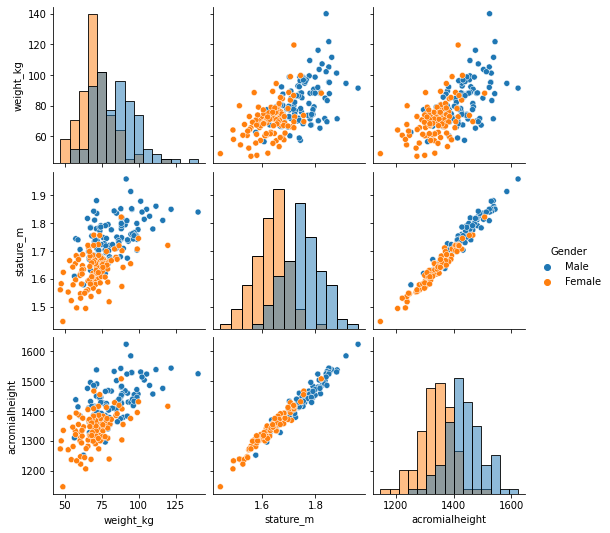

In [5]:
# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(ANSUR_1, hue='Gender', diag_kind='hist')

# Show the plot
plt.show()

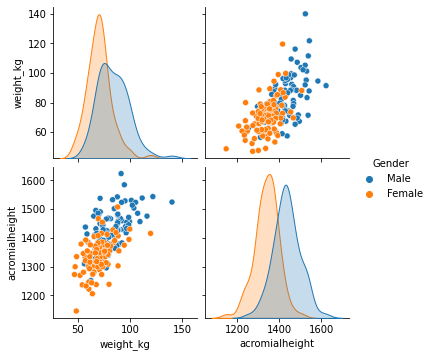

In [6]:
# Remove one of the redundant features
reduced_df = ANSUR_1.drop('stature_m', axis = 1)

# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(reduced_df, hue='Gender')

# Show the plot
plt.show()

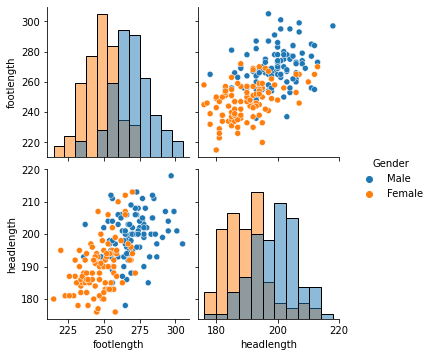

In [7]:
# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(ANSUR_2, hue='Gender', diag_kind='hist')

# Show the plot
plt.show()

## Fitting t-SNE to the ANSUR data

In [8]:
from sklearn.manifold import TSNE

# Non-numerical columns in the dataset
non_numeric = ['Branch', 'Gender', 'Component','BMI_class','Height_class']

# Drop the non-numerical columns from df
df_numeric = ANSUR_Female.drop(non_numeric, axis=1)

# Create a t-SNE model with learning rate 50
m = TSNE(learning_rate = 50)

# Fit and transform the t-SNE model on the numeric dataset
tsne_features = m.fit_transform(df_numeric)
print(tsne_features.shape)

(1986, 2)


In [9]:
x = pd.Series(tsne_features[:,0])
y = pd.Series(tsne_features[:,1])

df = pd.concat([ANSUR_Female,x,y], axis = 1)

df = df.rename(columns={0:'x',1:'y'})

In [10]:
df

,Branch,Component,Gender,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,...,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI,BMI_class,Height_class,x,y
0,Combat Support,Regular Army,Female,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,...,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,152,756,65.7,1.560,26.997041,Overweight,Normal,15.999275,-15.789216
1,Combat Service Support,Regular Army,Female,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,...,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,155,815,53.4,1.665,19.262506,Normal,Normal,6.257342,39.491356
2,Combat Service Support,Regular Army,Female,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,...,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,162,799,66.3,1.711,22.647148,Normal,Tall,-10.881290,31.246853
3,Combat Service Support,Regular Army,Female,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,...,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,173,818,78.2,1.660,28.378575,Overweight,Normal,-27.175432,2.599274
4,Combat Arms,Regular Army,Female,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,...,63,479,114,340,358,1350,116,345,242,1151,329,156,824,810,559,1702,1292,1030,766,197,766,429,116,800,1698,452,405,1163,300,380,911,152,762,88.6,1.572,35.853259,Overweight,Normal,-32.583664,-25.098209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,Combat Support,Army National Guard,Female,285,1392,335,223,1297,252,196,368,299,312,477,72,306,282,136,1089,255,856,652,541,373,1457,290,1082,293,1258,779,732,382,36,60,19,210,746,103,259,328,...,61,423,121,369,391,1307,118,414,237,1036,354,145,865,840,555,1716,1391,1119,660,155,749,446,136,872,1706,447,334,1043,265,370,1002,162,836,83.2,1.687,29.234331,Overweight,Normal,-38

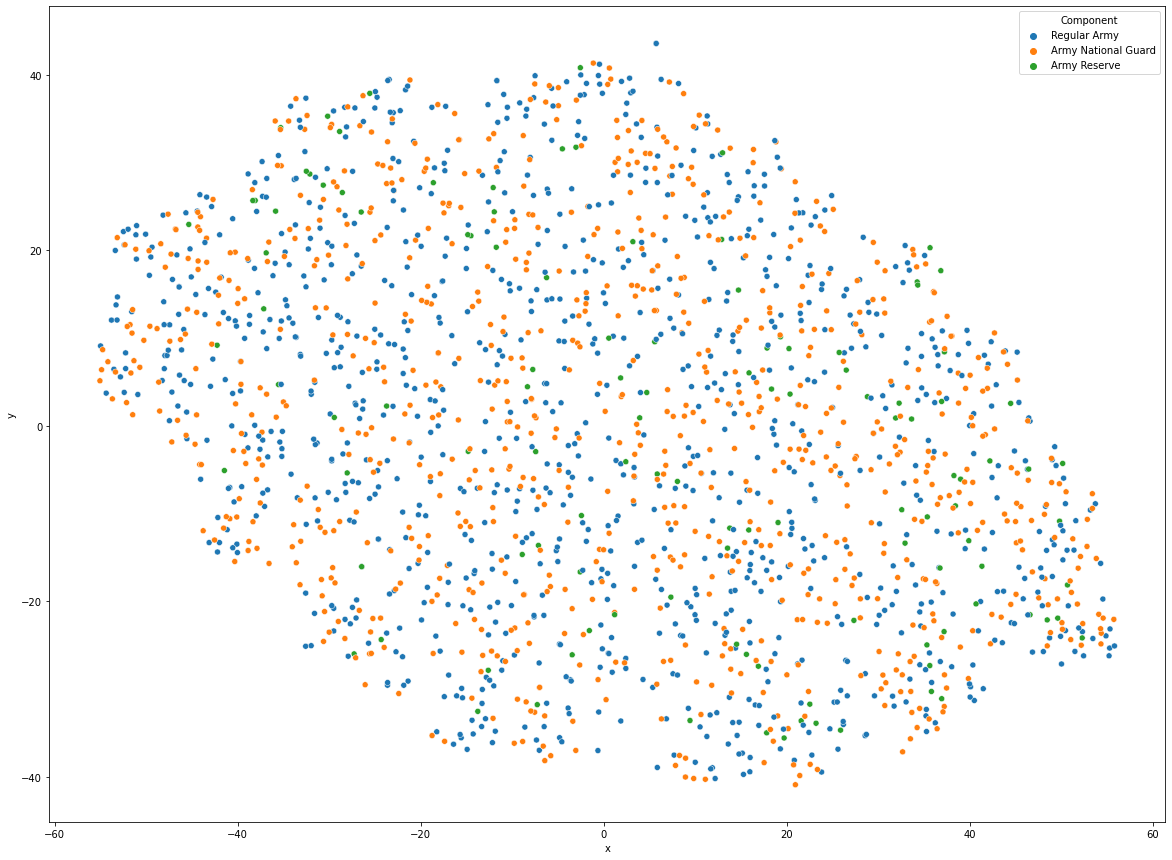

In [11]:
plt.figure(figsize=(20,15))
# Color the points according to Army Component
sns.scatterplot(x="x", y="y", hue='Component', data=df)

# Show the plot
plt.show()

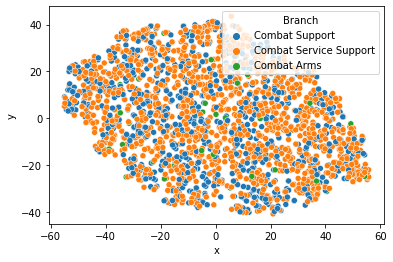

In [12]:
# Color the points by Army Branch
sns.scatterplot(x="x", y="y", hue='Branch', data=df)

# Show the plot
plt.show()

# Feature selection I, selecting for feature information

## Train-test Split

In [13]:
ansur_df = pd.concat([ANSUR_Male, ANSUR_Female])
ansur_df.reset_index(inplace = True)
ansur_df.drop(columns={'index'}, inplace = True)

In [14]:
ansur_df

,Branch,Component,Gender,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,...,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI,BMI_class,Height_class
0,Combat Arms,Regular Army,Male,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,...,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,175,853,81.5,1.776,25.838761,Overweight,Tall
1,Combat Support,Regular Army,Male,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,...,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,167,815,72.6,1.702,25.062103,Overweight,Normal
2,Combat Support,Regular Army,Male,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,...,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,180,831,92.9,1.735,30.861480,Overweight,Normal
3,Combat Service Support,Regular Army,Male,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,...,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,176,793,79.4,1.655,28.988417,Overweight,Normal
4,Combat Service Support,Regular Army,Male,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,...,666,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,188,954,94.6,1.914,25.823034,Overweight,Tall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6063,Combat Support,Army National Guard,Female,285,1392,335,223,1297,252,196,368,299,312,477,72,306,282,136,1089,255,856,652,541,373,1457,290,1082,293,1258,779,732,382,36,60,19,210,746,103,259,328,...,535,486,61,423,121,369,391,1307,118,414,237,1036,354,145,865,840,555,1716,1391,1119,660,155,749,446,136,872,1706,447,334,1043,265,370,1002,162,836,83.2,1.687,29.234331,Overweight,Normal
6064,Combat Supp

In [15]:
object_column = (ansur_df.dtypes == 'object')
categorical_columns = ansur_df.columns[object_column].tolist()
non_categorical_columns = ansur_df.columns[~object_column].tolist()
non_categorical_columns.append('Gender')

ansur_df = ansur_df[non_categorical_columns]

In [16]:
# Import train_test_split()
from sklearn.model_selection import train_test_split

# Select the Gender column as the feature to be predicted (y)
y = ansur_df['Gender']

# Remove the Gender column to create the training data
X = ansur_df.drop('Gender', axis = 1)

# Perform a 70% train and 30% test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print("{} rows in test set vs. {} in training set. {} Features.".format(X_test.shape[0], X_train.shape[0], X_test.shape[1]))

1821 rows in test set vs. 4247 in training set. 94 Features.


## Fitting and Testing Model

In [17]:
# Import SVC from sklearn.svm and accuracy_score from sklearn.metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an instance of the Support Vector Classification class
svc = SVC()

# Fit the model to the training data
svc.fit(X_train, y_train)

# Calculate accuracy scores on both train and test data
accuracy_train = accuracy_score(y_train, svc.predict(X_train))
accuracy_test = accuracy_score(y_test, svc.predict(X_test))

print("{0:.1%} accuracy on test set vs. {1:.1%} on training set".format(accuracy_test, accuracy_train))

99.1% accuracy on test set vs. 98.9% on training set


## Accuracy after dimensionality reduction

In [18]:
# Assign just the 'neckcircumferencebase' column from ansur_df to X
X = ansur_df[['neckcircumferencebase']]

# Split the data, instantiate a classifier and fit the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
svc = SVC()
svc.fit(X_train, y_train)

# Calculate accuracy scores on both train and test data
accuracy_train = accuracy_score(y_train, svc.predict(X_train))
accuracy_test = accuracy_score(y_test, svc.predict(X_test))

print("{0:.1%} accuracy on test set vs. {1:.1%} on training set".format(accuracy_test, accuracy_train))

92.6% accuracy on test set vs. 93.7% on training set


On the full dataset the model is rubbish but with a single feature we can make good predictions? This is an example of the curse of dimensionality! The model badly overfits when we feed it too many features. It overlooks that neck circumference by itself is pretty different for males and females.

## Finding a good variance threshold

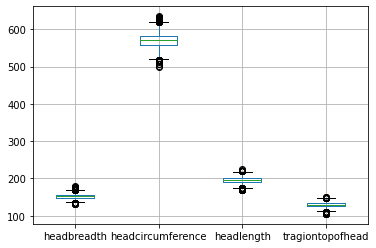

In [19]:
column = ['headbreadth','headcircumference','headlength','tragiontopofhead']
head_df = ansur_df[column]

head_df.boxplot()
plt.show()

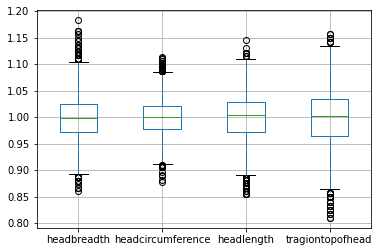

headbreadth          0.001679
headcircumference    0.001030
headlength           0.001868
tragiontopofhead     0.002640
dtype: float64


In [20]:
# Normalize the data
normalized_df = head_df / head_df.mean()

normalized_df.boxplot()
plt.show()

# Print the variances of the normalized data
print(normalized_df.var())

In [21]:
from sklearn.feature_selection import VarianceThreshold

# Create a VarianceThreshold feature selector
sel = VarianceThreshold(threshold=0.001)

# Fit the selector to normalized head_df
sel.fit(head_df / head_df.mean())

# Create a boolean mask
mask = sel.get_support()

# Apply the mask to create a reduced dataframe
reduced_df = head_df.loc[:, mask]

print("Dimensionality reduced from {} to {}.".format(head_df.shape[1], reduced_df.shape[1]))

Dimensionality reduced from 4 to 4.


## Visualizing the correlation matrix

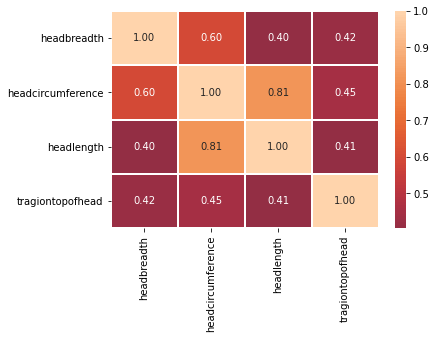

In [22]:
# Create the correlation matrix
corr = head_df.corr()

# Draw the heatmap
sns.heatmap(corr,  center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

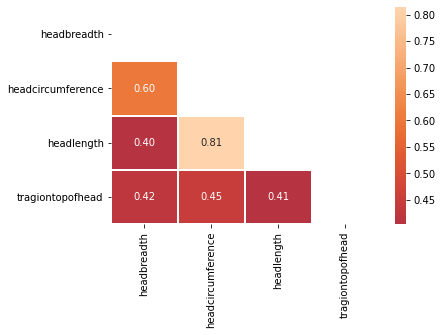

In [23]:
# Create the correlation matrix
corr = head_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Add the mask to the heatmap
sns.heatmap(corr, mask=mask, center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

# Feature selection II, selecting for model accuracy

## Building a diabetes classifier
You'll be using the Pima Indians diabetes dataset to predict whether a person has diabetes using logistic regression. There are 8 features and one target in this dataset. 

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [25]:
pima

,pregnant,glucose,diastolic,triceps,insulin,bmi,family,age,test
0,1,89,66,23,94,28.1,0.167,21,negative
1,0,137,40,35,168,43.1,2.288,33,positive
2,3,78,50,32,88,31.0,0.248,26,positive
3,2,197,70,45,543,30.5,0.158,53,positive
4,1,189,60,23,846,30.1,0.398,59,positive
...,...,...,...,...,...,...,...,...,...
387,0,181,88,44,510,43.3,0.222,26,positive
388,1,128,88,39,110,36.5,1.057,37,positive
389,2,88,58,26,16,28.4,0.766,22,negative
390,10,101,76,48,180,32.9,0.171,63,negative


In [26]:
X = pima.iloc[:,:-1]
y = pima.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)



In [27]:
scaler = StandardScaler()
lr = LogisticRegression()

# Fit the scaler on the training features and transform these in one go
X_train_std = scaler.fit_transform(X_train)

# Fit the logistic regression model on the scaled training data
lr.fit(X_train_std, y_train)

# Scale the test features
X_test_std = scaler.transform(X_test)

# Predict diabetes presence on the scaled test set
y_pred = lr.predict(X_test_std)

# Prints accuracy metrics and feature coefficients
print("{0:.1%} accuracy on test set.".format(accuracy_score(y_test, y_pred))) 
print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))

76.3% accuracy on test set.
{'pregnant': 0.26, 'glucose': 0.99, 'diastolic': 0.08, 'triceps': 0.14, 'insulin': 0.0, 'bmi': 0.46, 'family': 0.32, 'age': 0.39}


## Manual Recursive Feature Elimination

In [28]:
# Remove the feature with the lowest model coefficient
X = pima[['pregnant', 'glucose', 'triceps', 'insulin', 'bmi', 'family', 'age']]

# Performs a 25-75% train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Scales features and fits the logistic regression model
lr.fit(scaler.fit_transform(X_train), y_train)

# Calculates the accuracy on the test set and prints coefficients
acc = accuracy_score(y_test, lr.predict(scaler.transform(X_test)))
print("{0:.1%} accuracy on test set.".format(acc)) 
print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))

80.6% accuracy on test set.
{'pregnant': 0.05, 'glucose': 1.24, 'triceps': 0.24, 'insulin': 0.2, 'bmi': 0.39, 'family': 0.34, 'age': 0.35}


In [29]:
# Remove the 2 features with the lowest model coefficients
X = pima[['glucose', 'triceps', 'bmi', 'family', 'age']]

# Performs a 25-75% train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Scales features and fits the logistic regression model
lr.fit(scaler.fit_transform(X_train), y_train)

# Calculates the accuracy on the test set and prints coefficients
acc = accuracy_score(y_test, lr.predict(scaler.transform(X_test)))
print("{0:.1%} accuracy on test set.".format(acc)) 
print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))

79.6% accuracy on test set.
{'glucose': 1.13, 'triceps': 0.25, 'bmi': 0.34, 'family': 0.34, 'age': 0.37}


In [30]:
# Only keep the feature with the highest coefficient
X = pima[['glucose']]

# Performs a 25-75% train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Scales features and fits the logistic regression model to the data
lr.fit(scaler.fit_transform(X_train), y_train)

# Calculates the accuracy on the test set and prints coefficients
acc = accuracy_score(y_test, lr.predict(scaler.transform(X_test)))
print("{0:.1%} accuracy on test set.".format(acc)) 
print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))

75.5% accuracy on test set.
{'glucose': 1.28}


## Automatic Recursive Feature Elimination

In [31]:
from sklearn.feature_selection import RFE

X = pima.iloc[:,:-1]
y = pima.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Create the RFE with a LogisticRegression estimator and 3 features to select
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=3, verbose=1)

# Fits the eliminator to the data
rfe.fit(X_train, y_train)

# Print the features and their ranking (high = dropped early on)
print(dict(zip(X.columns, rfe.ranking_)))

# Print the features that are not eliminated
print(X.columns[rfe.support_])

# Calculates the test set accuracy
acc = accuracy_score(y_test, rfe.predict(X_test))
print("{0:.1%} accuracy on test set.".format(acc)) 

Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
{'pregnant': 2, 'glucose': 3, 'diastolic': 5, 'triceps': 4, 'insulin': 6, 'bmi': 1, 'family': 1, 'age': 1}
Index(['bmi', 'family', 'age'], dtype='object')
73.7% accuracy on test set.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## Building a random forest model

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
# Perform a 75% training and 25% test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Fit the random forest model to the training data
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

# Calculate the accuracy
acc = accuracy_score(y_test, rf.predict(X_test))

# Print the importances per feature
print(dict(zip(X.columns, rf.feature_importances_.round(2))))

# Print accuracy
print("{0:.1%} accuracy on test set.".format(acc))

{'pregnant': 0.07, 'glucose': 0.25, 'diastolic': 0.09, 'triceps': 0.09, 'insulin': 0.14, 'bmi': 0.12, 'family': 0.12, 'age': 0.13}
79.6% accuracy on test set.


## Random Forest for Feature Selection

In [34]:
# Create a mask for features importances above the threshold
mask = rf.feature_importances_ > 0.15

# Prints out the mask
print(mask)

# Create a mask for features importances above the threshold
mask = rf.feature_importances_ > 0.15

# Apply the mask to the feature dataset X
reduced_X = X.loc[:,mask]

# prints out the selected column names
print(reduced_X.columns)

[False  True False False False False False False]
Index(['glucose'], dtype='object')


## Recursive Feature Elimination with random forests

In [35]:
# Wrap the feature eliminator around the random forest model
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=2, verbose=1)

# Fit the model to the training data
rfe.fit(X_train, y_train)

# Create a mask
mask = rfe.support_

# Apply the mask to the feature dataset X and print the result
reduced_X = X.loc[:, mask]
print(reduced_X.columns)

Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Index(['glucose', 'bmi'], dtype='object')


## Creating a LASSO Regressor

In [36]:
from sklearn.linear_model import Lasso

In [37]:
X = ansur_df.drop(columns={"BMI","Gender"})
y = ansur_df['BMI']

# Set the test size to 30% to get a 70-30% train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Fit the scaler on the training features and transform these in one go
X_train_std = scaler.fit_transform(X_train)

# Create the Lasso model
la = Lasso()

# Fit it to the standardized training data
la.fit(X_train_std, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [38]:
# Transform the test set with the pre-fitted scaler
X_test_std = scaler.transform(X_test)

# Calculate the coefficient of determination (R squared) on X_test_std
r_squared = la.score(X_test_std, y_test)
print("The model can predict {0:.1%} of the variance in the test set.".format(r_squared))

# Create a list that has True values when coefficients equal 0
zero_coef = la.coef_ == 0

# Calculate how many features have a zero coefficient
n_ignored = sum(zero_coef)
print("The model has ignored {} out of {} features.".format(n_ignored, len(la.coef_)))

The model can predict 82.9% of the variance in the test set.
The model has ignored 83 out of 93 features.


## Adjusting the Regularization Strength

In [39]:
alphas = [0.01, 0.1, 0.5, 1]
r_square = []
ignored_features = []
for alpha in alphas:
  # Find the highest alpha value with R-squared above 98%
  la = Lasso(alpha = alpha, random_state=0)

  # Fits the model and calculates performance stats
  la.fit(X_train_std, y_train)
  r_squared = la.score(X_test_std, y_test)
  n_ignored_features = sum(la.coef_ == 0)

  # Print peformance stats 
  r_square.append(r_squared)
  ignored_features.append(n_ignored_features)

alpha_df = {'Alpha Regularization':alphas, 'R Squared':r_square, 'Number of ignored features':ignored_features}
alpha_df = pd.DataFrame(alpha_df)

In [40]:
alpha_df

,Alpha Regularization,R Squared,Number of ignored features
0,0.01,0.993253,53
1,0.10,0.984664,69
2,0.50,0.908122,82
3,1.00,0.829483,83


## Creating a LassoCV regressor

In [47]:
from sklearn.linear_model import LassoCV

X = ansur_df.iloc[:,:33]
y = ansur_df['BMI']

# Create and fit the LassoCV model on the training set
lcv = LassoCV()
lcv.fit(X_train_std,y_train)
print('Optimal alpha = {0:.3f}'.format(lcv.alpha_))

# Calculate R squared on the test set
r_squared = lcv.score(X_test_std,y_test)
print('The model explains {0:.1%} of the test set variance'.format(r_squared))

# Create a mask for coefficients not equal to zero
lcv_mask = lcv.coef_ != 0
print('{} features out of {} selected'.format(sum(lcv_mask), len(lcv_mask)))

Optimal alpha = 0.004
The model explains 97.7% of the test set variance
28 features out of 33 selected


## Ensemble models for extra votes

In [48]:
X = ansur_df.iloc[:,:33]
y = ansur_df['BMI']

# Set the test size to 30% to get a 70-30% train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Fit the scaler on the training features and transform these in one go
X_train_std = scaler.fit_transform(X_train)

# Transform the test set with pre-fitted scaler
X_test_std = scaler.transform(X_test)

In [49]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingRegressor

# Select 10 features with RFE on a GradientBoostingRegressor, drop 3 features on each step
rfe_gb = RFE(estimator=GradientBoostingRegressor(), 
             n_features_to_select=10, step=3, verbose=1)
rfe_gb.fit(X_train_std, y_train)

# Calculate the R squared on the test set
r_squared = rfe_gb.score(X_test_std, y_test)
print('The model can explain {0:.1%} of the variance in the test set'.format(r_squared))

# Assign the support array to gb_mask
gb_mask = rfe_gb.support_


Fitting estimator with 33 features.
Fitting estimator with 30 features.
Fitting estimator with 27 features.
Fitting estimator with 24 features.
Fitting estimator with 21 features.
Fitting estimator with 18 features.
Fitting estimator with 15 features.
Fitting estimator with 12 features.
The model can explain 96.6% of the variance in the test set


In [50]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# Select 10 features with RFE on a RandomForestRegressor, drop 3 features on each step
rfe_rf = RFE(estimator=RandomForestRegressor(), 
             n_features_to_select=10, step=3, verbose=1)
rfe_rf.fit(X_train_std, y_train)

# Calculate the R squared on the test set
r_squared = rfe_rf.score(X_test_std, y_test)
print('The model can explain {0:.1%} of the variance in the test set'.format(r_squared))

# Assign the support array to gb_mask
rf_mask = rfe_rf.support_

Fitting estimator with 33 features.
Fitting estimator with 30 features.
Fitting estimator with 27 features.
Fitting estimator with 24 features.
Fitting estimator with 21 features.
Fitting estimator with 18 features.
Fitting estimator with 15 features.
Fitting estimator with 12 features.
The model can explain 96.0% of the variance in the test set


## Combining 3 feature selectors

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
# Sum the votes of the three models
votes = np.sum([lcv_mask, rf_mask, gb_mask], axis = 0)

# Create a mask for features selected by all 3 models
meta_mask = votes >= 3

# Apply the dimensionality reduction on X
X_reduced = X.loc[:,meta_mask]
print(X_reduced.columns)

# Plug the reduced dataset into a linear regression pipeline
lm = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=0)
lm.fit(scaler.fit_transform(X_train), y_train)
r_squared = lm.score(scaler.transform(X_test), y_test)
print('The model can explain {0:.1%} of the variance in the test set using {1:} features.'.format(r_squared, len(lm.coef_)))

Index(['abdominalextensiondepthsitting', 'axillaheight',
       'bicepscircumferenceflexed', 'buttockcircumference', 'buttockdepth',
       'calfcircumference', 'cervicaleheight', 'chestcircumference',
       'chestdepth'],
      dtype='object')
The model can explain 97.1% of the variance in the test set using 9 features.


# Feature Extraction

## Manual feature extraction I

In [53]:
sales_df = grocery_sales

In [54]:
# Calculate the price from the quantity sold and revenue
sales_df['price'] = sales_df['revenue']/sales_df['quantity']

# Drop the quantity and revenue features
reduced_df = sales_df.drop(['quantity','revenue'], axis=1)

print(reduced_df.head())

  storeID  product     price
0       A   Apples  5.135616
1       A  Bananas  3.365105
2       A  Oranges  5.317020
3       B   Apples  5.143417
4       B  Bananas  3.898517


## Principal Component Analysis

In [55]:
ansur_df = ansur_df.iloc[:1000, :5]

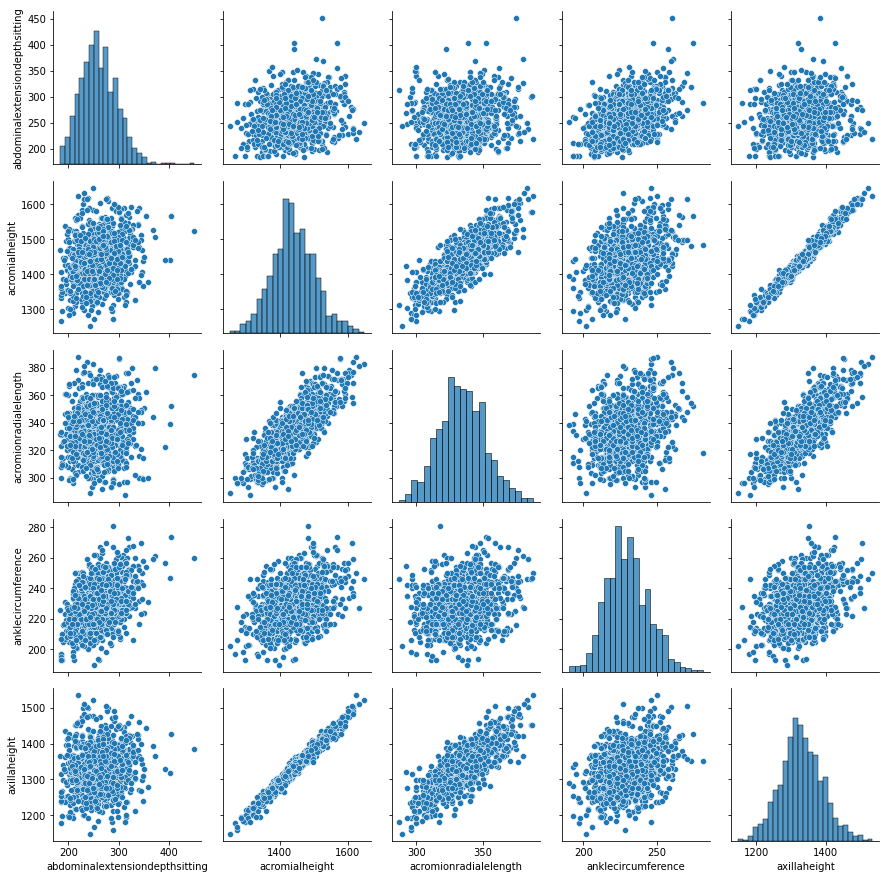

In [56]:
# Create a pairplot to inspect ansur_df
sns.pairplot(ansur_df)

plt.show()

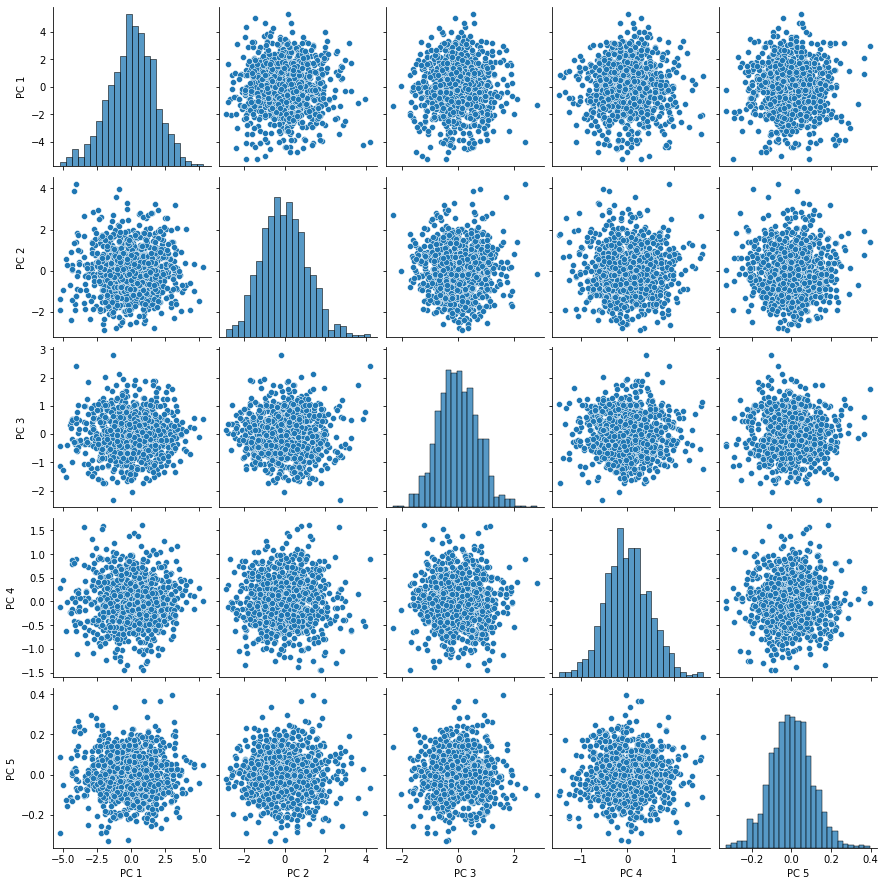

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Create the scaler and standardize the data
scaler = StandardScaler()
ansur_std = scaler.fit_transform(ansur_df)

# Create the PCA instance and fit and transform the data with pca
pca = PCA()
pc = pca.fit_transform(ansur_std)

# This changes the numpy array output back to a dataframe
pc_df = pd.DataFrame(pc, columns=['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5'])

# Create a pairplot of the principal component dataframe
sns.pairplot(pc_df)
plt.show()

Notice how, in contrast to the input features, none of the principal components are correlated to one another.

### On a larger dataset

In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Scale the data
scaler = StandardScaler()
ansur_std = scaler.fit_transform(ansur_df)

# Apply PCA
pca = PCA()
pca.fit(ansur_std)

# Inspect the explained variance ratio per component
print(pca.explained_variance_ratio_)

# Print the cumulative sum of the explained variance ratio
print(pca.explained_variance_ratio_.cumsum())

[0.59407035 0.25402226 0.10208094 0.04758578 0.00224067]
[0.59407035 0.84809261 0.95017355 0.99775933 1.        ]


## Understanding the Components

In [61]:
from sklearn.pipeline import Pipeline

In [71]:
poke_df = pokemon.iloc[:,5:12]

In [72]:
poke_df

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,45,49,49,65,65,45,1
1,60,62,63,80,80,60,1
2,80,82,83,100,100,80,1
3,80,100,123,122,120,80,1
4,39,52,43,60,50,65,1
...,...,...,...,...,...,...,...
795,50,100,150,100,150,50,6
796,50,160,110,160,110,110,6
797,80,110,60,150,130,70,6
798,80,160,60,170,130,80,6


In [73]:
# Build the pipeline
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components=2))])

# Fit it to the dataset and extract the component vectors
pipe.fit(poke_df)
vectors = pipe.steps[1][1].components_.round(2)

# Print feature effects
print('PC 1 effects = ' + str(dict(zip(poke_df.columns, vectors[0]))))
print('PC 2 effects = ' + str(dict(zip(poke_df.columns, vectors[1]))))

PC 1 effects = {'HP': 0.39, 'Attack': 0.44, 'Defense': 0.36, 'Sp. Atk': 0.46, 'Sp. Def': 0.45, 'Speed': 0.33, 'Generation': 0.05}
PC 2 effects = {'HP': 0.1, 'Attack': -0.0, 'Defense': 0.57, 'Sp. Atk': -0.29, 'Sp. Def': 0.2, 'Speed': -0.64, 'Generation': 0.36}


## PCA for feature exploration

In [75]:
# Build the pipeline
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=2))])

# Fit the pipeline to poke_df and transform the data
pc = pipe.fit_transform(poke_df)

print(pc)

[[-1.62215312 -0.50689417]
 [-0.43012515 -0.55674925]
 [ 1.21090811 -0.59931939]
 ...
 [ 2.53262417  0.05064599]
 [ 3.60354469 -0.35624802]
 [ 2.30964754  1.03813409]]


In [76]:
pokemon

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [78]:
poke_cat_df = pokemon[['Type 1','Legendary']]

In [79]:
poke_cat_df

,Type 1,Legendary
0,Grass,False
1,Grass,False
2,Grass,False
3,Grass,False
4,Fire,False
...,...,...
795,Rock,True
796,Rock,True
797,Psychic,True
798,Psychic,True


In [81]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=2))])

# Fit the pipeline to poke_df and transform the data
pc = pipe.fit_transform(poke_df)

# Add the 2 components to poke_cat_df
poke_cat_df['PC 1'] = pc[:, 0]
poke_cat_df['PC 2'] = pc[:, 1]

poke_cat_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Type 1,Legendary,PC 1,PC 2
0,Grass,False,-1.622153,-0.506894
1,Grass,False,-0.430125,-0.556749
2,Grass,False,1.210908,-0.599319
3,Grass,False,2.550683,0.072140
4,Fire,False,-1.824863,-1.145230


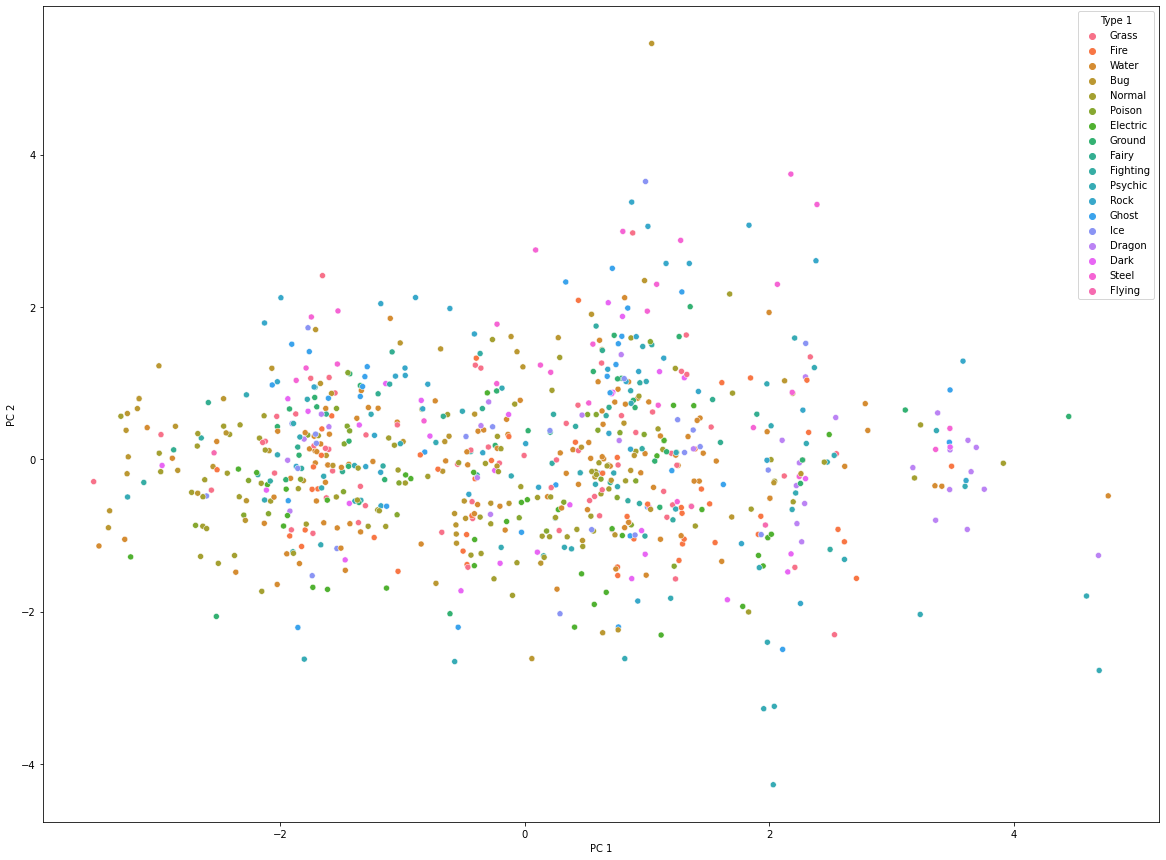

In [85]:
# Use the Type feature to color the PC 1 vs PC 2 scatterplot
plt.figure(figsize = (20,15))
sns.scatterplot(data=poke_cat_df, 
                x='PC 1', y='PC 2', hue='Type 1')
plt.show()

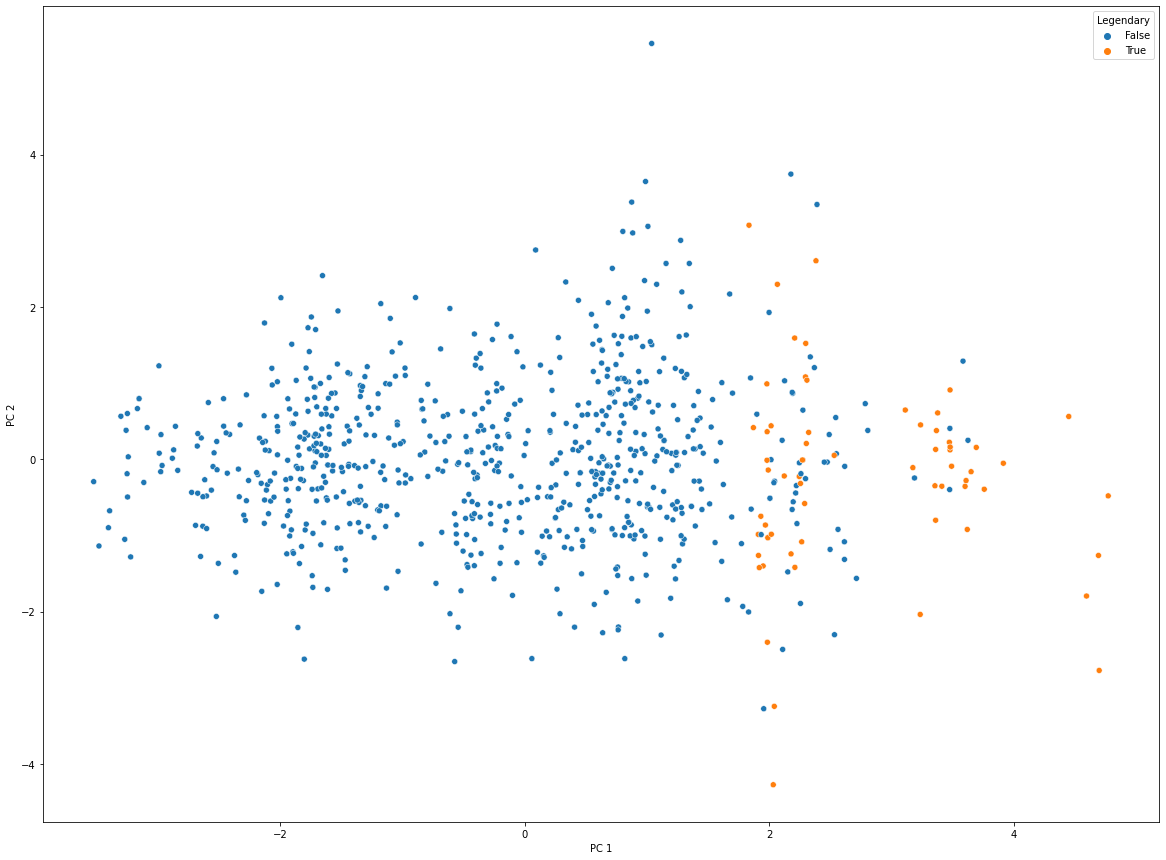

In [86]:
# Use the Type feature to color the PC 1 vs PC 2 scatterplot
plt.figure(figsize = (20,15))
sns.scatterplot(data=poke_cat_df, 
                x='PC 1', y='PC 2', hue='Legendary')
plt.show()

Looks like the different types are scattered all over the place while the legendary Pokemon always score high for PC 1 meaning they have high stats overall. Their spread along the PC 2 axis tells us they aren't consistently fast and vulnerable or slow and armored.

## PCA in a model pipeline

In [87]:
# Build the pipeline
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reducer', PCA(n_components = 2)),
        ('classifier', RandomForestClassifier(random_state = 0))])

In [92]:
X = poke_df.iloc[:,:-1]
y = pokemon['Legendary']

# Set the test size to 30% to get a 70-30% train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Prints the explained variance ratio
print(pipe.steps[1][1].explained_variance_ratio_)

# Score the accuracy on the test set
accuracy = pipe.score(X_test, y_test)

# Prints the model accuracy
print('{0:.1%} test set accuracy'.format(accuracy))

[0.45673596 0.18599109]
92.1% test set accuracy


In [93]:
# Build the pipeline
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reducer', PCA(n_components=3)),
        ('classifier', RandomForestClassifier(random_state=0))])

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Score the accuracy on the test set
accuracy = pipe.score(X_test, y_test)

# Prints the explained variance ratio and accuracy
print(pipe.steps[1][1].explained_variance_ratio_)
print('{0:.1%} test set accuracy'.format(accuracy))

[0.45673596 0.18599109 0.12852181]
93.8% test set accuracy


## Selecting the proportion of variance to keep

In [127]:
non_categorical_columns.remove('Gender')

In [128]:
ansur_df = pd.concat([ANSUR_Male.iloc[:1000], ANSUR_Female.iloc[:1000]], axis = 0)
ansur_df = ansur_df[non_categorical_columns]

In [129]:
ansur_df

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,...,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,...,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,175,853,81.5,1.776,25.838761
1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,...,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,167,815,72.6,1.702,25.062103
2,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,...,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,180,831,92.9,1.735,30.861480
3,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,...,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,176,793,79.4,1.655,28.988417
4,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,...,505,612,666,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,188,954,94.6,1.914,25.823034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,237,1325,307,209,1236,225,185,336,307,263,422,67,319,280,139,982,227,875,613,517,369,1372,243,907,240,1172,825,518,272,31,62,19,197,694,90,247,324,266,518,447,...,370,467,524,483,67,397,109,317,356,1231,107,403,245,978,334,115,788,776,534,1668,1316,1065,612,161,797,446,127,883,1422,430,303,896,238,346,979,151,793,62.4,1.590,24.682568
996,170,1271,314,186,1200,207,175,355,233,228,379,61,298,268,125,854,202,825,570,478,323,1335,226,726,185,1149,779,570,326,32,57,17,184,709,84,237,312,221,391,427,...,345,435

In [130]:
# Pipe a scaler to PCA selecting 80% of the variance
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components=0.8))])

# Fit the pipe to the data
pipe.fit(ansur_df)

print('{} components selected'.format(len(pipe.steps[1][1].components_)))



5 components selected


In [131]:
# Let PCA select 90% of the variance
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components=0.9))])

# Fit the pipe to the data
pipe.fit(ansur_df)

print('{} components selected'.format(len(pipe.steps[1][1].components_)))

16 components selected


## Choosing the number of components

In [132]:
# Pipeline a scaler and PCA selecting 10 components
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components = 10))])

# Fit the pipe to the data
pipe.fit(ansur_df)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('reducer',
                 PCA(copy=True, iterated_power='auto', n_components=10,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False))],
         verbose=False)

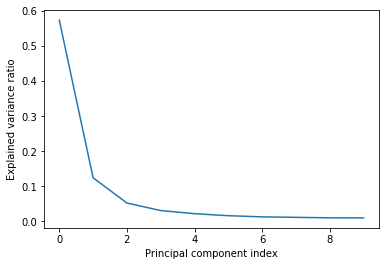

In [133]:
# Pipeline a scaler and pca selecting 10 components
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components=10))])

# Fit the pipe to the data
pipe.fit(ansur_df)

# Plot the explained variance ratio
plt.plot(pipe.steps[1][1].explained_variance_ratio_)

plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')
plt.show()